In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
import re

In [29]:
df=pd.read_csv(r"E:\MAHIRA-BCA\SPYDER\Groceries.csv")

In [30]:
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [31]:
df[df["Member_number"]==2552]

,Member_number,Date,itemDescription,year,month,day,day_of_week
1,2552,2015-05-01,whole milk,2015,5,1,4
11292,2552,2014-08-10,butter,2014,8,10,6
11361,2552,2014-06-20,female sanitary products,2014,6,20,4
12226,2552,2014-11-07,pot plants,2014,11,7,4
14417,2552,2014-02-19,other vegetables,2014,2,19,2
16150,2552,2015-05-01,tropical fruit,2015,5,1,4
27441,2552,2014-08-10,root vegetables,2014,8,10,6
27510,2552,2014-06-20,whole milk,2014,6,20,4
28375,2552,2014-11-07,shopping bags,2014,11,7,4
30566,2552,2014-02-19,chocolate,2014,2,19,2


In [32]:
df=df.drop(["year","month","day","day_of_week","Date"],axis=1)
df

,Member_number,itemDescription
0,1808,tropical fruit
1,2552,whole milk
2,2300,pip fruit
3,1187,other vegetables
4,3037,whole milk
...,...,...
38760,4471,sliced cheese
38761,2022,candy
38762,1097,cake bar
38763,1510,fruit/vegetable juice


In [33]:
x=df["itemDescription"].value_counts().sort_values(ascending=False)[:20]
x

itemDescription
whole milk            2502
other vegetables      1898
rolls/buns            1716
soda                  1514
yogurt                1334
root vegetables       1071
tropical fruit        1032
bottled water          933
sausage                924
citrus fruit           812
pastry                 785
pip fruit              744
shopping bags          731
canned beer            717
bottled beer           687
whipped/sour cream     662
newspapers             596
frankfurter            580
brown bread            571
domestic eggs          566
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'whole milk'),
  Text(1, 0, 'other vegetables'),
  Text(2, 0, 'rolls/buns'),
  Text(3, 0, 'soda'),
  Text(4, 0, 'yogurt'),
  Text(5, 0, 'root vegetables'),
  Text(6, 0, 'tropical fruit'),
  Text(7, 0, 'bottled water'),
  Text(8, 0, 'sausage'),
  Text(9, 0, 'citrus fruit'),
  Text(10, 0, 'pastry'),
  Text(11, 0, 'pip fruit'),
  Text(12, 0, 'shopping bags'),
  Text(13, 0, 'canned beer'),
  Text(14, 0, 'bottled beer'),
  Text(15, 0, 'whipped/sour cream'),
  Text(16, 0, 'newspapers'),
  Text(17, 0, 'frankfurter'),
  Text(18, 0, 'brown bread'),
  Text(19, 0, 'domestic eggs')])

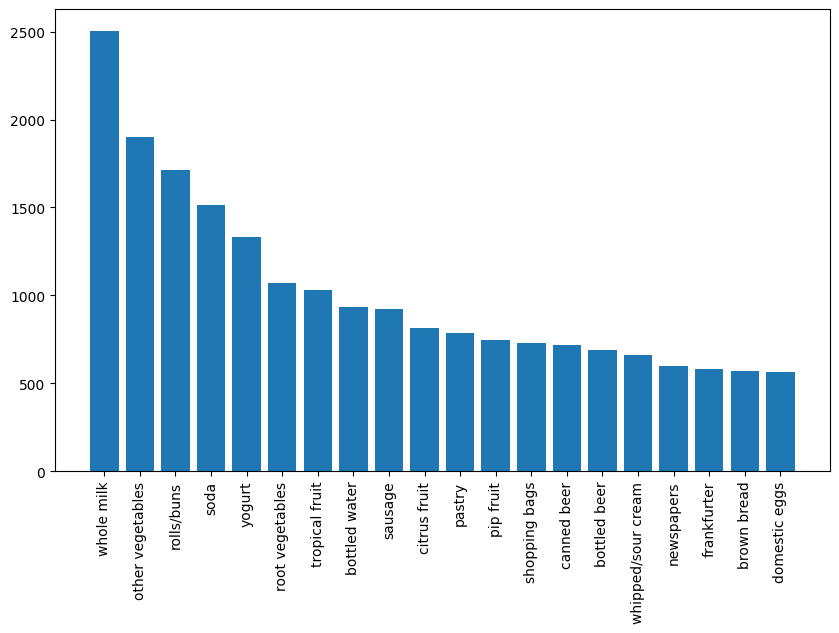

In [15]:
plt.figure(figsize=(10,6))
plt.bar(x.index,x.values)
plt.xticks(rotation=90)

In [34]:
df['Quantity']=1
df

,Member_number,itemDescription,Quantity
0,1808,tropical fruit,1
1,2552,whole milk,1
2,2300,pip fruit,1
3,1187,other vegetables,1
4,3037,whole milk,1
...,...,...,...
38760,4471,sliced cheese,1
38761,2022,candy,1
38762,1097,cake bar,1
38763,1510,fruit/vegetable juice,1


In [35]:
transactions=df.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')

In [36]:
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
transactions=transactions.fillna(0)
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
def encode(x):
    if x<=0:
        return 0
    elif x>=0:
        return 1

In [39]:
basket=transactions.applymap(encode)
basket

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5936\994739870.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket=transactions.applymap(encode)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
frequent_itemsets=apriori(basket,min_support=0.06,use_colnames=True)
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [41]:
frequent_itemsets

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
111,0.082093,"(rolls/buns, other vegetables, whole milk)"
112,0.069266,"(other vegetables, whole milk, soda)"
113,0.071832,"(yogurt, other vegetables, whole milk)"
114,0.065162,"(rolls/buns, whole milk, soda)"


In [42]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754,0.269364
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
2,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,0.008692,1.028212,0.203563
3,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
4,(rolls/buns),(bottled beer),0.349666,0.158799,0.063109,0.180484,1.136555,0.007582,1.026461,0.184748
...,...,...,...,...,...,...,...,...,...,...
153,"(rolls/buns, whole milk)",(yogurt),0.178553,0.282966,0.065931,0.369253,1.304939,0.015407,1.136802,0.284474
154,"(yogurt, whole milk)",(rolls/buns),0.150590,0.349666,0.065931,0.437819,1.252106,0.013275,1.156805,0.237041
155,(rolls/buns),"(yogurt, whole milk)",0.349666,0.150590,0.065931,0.188555,1.252106,0.013275,1.046786,0.309603
156,(yogurt),"(rolls/buns, whole milk)",0.282966,0.178553,0.065931,0.233001,1.304939,0.015407,1.070988,0.325899


In [43]:
milk_rules = rules[rules['antecedents'].astype(str).str.contains('yogurt')]
milk_rules = milk_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)
milk_rules[milk_rules["confidence"]>=0.5]
#display(milk_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,"(yogurt, other vegetables)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507,0.264348
4,"(rolls/buns, yogurt)",(whole milk),0.111339,0.458184,0.065931,0.592166,1.292420,0.014917,1.328521,0.254605
7,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926


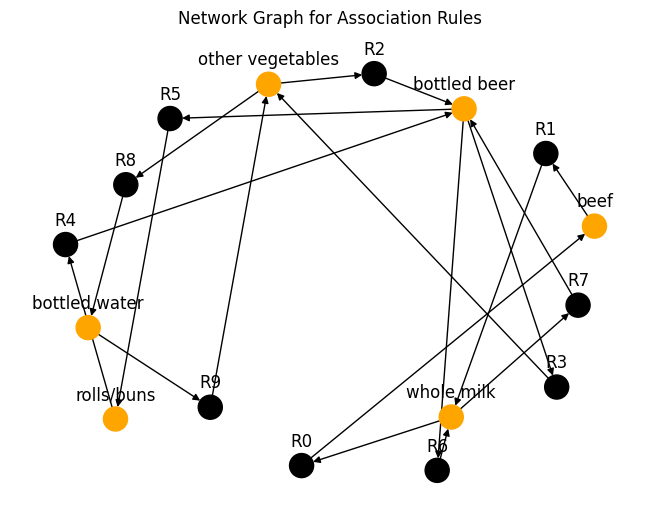

In [44]:
def draw_network(rules,rules_to_show):
    #directional graph from NetworkX
    network=nx.DiGraph()

    #loop through number of rules to show
    for i in range(rules_to_show):

        #add a rule node
        network.add_node("R"+str(i),color="black") # Add rule node in black color

        #add antecedents as nodes and edges
        for antecedent in rules.iloc[i]['antecedents']:
            network.add_node(antecedent,color='orange') # Add antecedent node with orange color
            network.add_edge(antecedent,"R"+str(i),weight=2) # Link antecedent to rule

        #add consequents as nodes and edges
        for consequent in rules.iloc[i]['consequents']:
            network.add_node(consequent,color='orange') # Add consequent node with orange color
            network.add_edge("R"+str(i),consequent,weight=2) # Link rule to consequent

    #extract node colors for visualization
    node_colors=[network.nodes[node]['color'] for node in network.nodes]

    #position nodes using spring layout
    pos=nx.spring_layout(network,k=16,scale=1)

    #draw the network graph
    nx.draw(network,pos,node_color=node_colors,font_size=8)

    #shift the text position upwards
    for p in pos:
        pos[p][1]+=0.12

    #drawing labels
    nx.draw_networkx_labels(network, pos)

    #set title and display the graph
    plt.title("Network Graph for Association Rules")
draw_network(rules, 10)